In [1]:
import pandas as pd
from time import sleep
from random import shuffle

In [18]:
import insta as IG
insta = IG.Instagram()
insta.login()

In [31]:
insta.get_follow('followers')

.............................................................

In [32]:
insta.get_follow('following')

..................................................................

In [6]:
insta.get_photos()

In [2]:
follower = pd.read_pickle('followers.pickle')
follower.shape

(851, 6)

In [3]:
following = pd.read_pickle('following.pickle')
following.shape

(1123, 6)

In [4]:
following = following.sort_values('time_first')
following_not_follower = [x for x in following[following['time_last'] == max(following['time_last'])]['username'].values if x  not in follower['username'].values ]
print(len(following_not_follower),following_not_follower)

359 ['juliacfranco', 'filipedeschamps', 'leandrogrisoni', 'seu_hulk', 'beatriz.cabral.felicidade', 'martal.borges', 'adrienchaltiel', 'lara_pmp', 'fonsecamarcosfelipe', 'marcos.zerbini', 'delunaanderson', 'angelamaria.rocha.71', 'josemarcelopimenta', 'monique.rj', 'raspberrypifoundation', 'peenricoarrig', 'josecarmelomastrangelo', 'pedroasti', 'flaviocotrimpinheiro', 'gautlmx', 'bianca.moreirabm', 'karen_fajardo_horn', 'leonardoloriato', 'thiagompc', 'barrionuevomauro', 'cesarsalim8', 'marcellablok', 'dani_calazans', 'anapaulajelihovschi', 'pgsiviero', 'mila.campbell', 'ployola03', 'eduardosantos2308', 'snsouza', 'taycartagena', 'nathsurf16', 'helfereduardo', 'psicologaclaracarr', 'gomessoaresrenata', 'henriqueqgalvao', 'mpinhanez', 'adrikahn', 'hugobcmt', 'jorge_porfirio_as', 'anaclarabcastro', 'anapaulaprado10', 'thiago.l.campos', 'andre.fernandes001', 'anaghis', 'marcellogt.rio', 'stellacaymmi', 'fernandesilvaantonio', 'savios.machado', 'leolenin1982', 'vollmermarcus', 'labasence', 

In [5]:
follower_not_following = [x for x in follower[follower['status'] != 'Solicitado']['username'].values if x  not in following['username'].values ]
print(len(follower_not_following),follower_not_following)

437 ['fotodobrasil_marcelovianna', 'hiphopmusicccf_28', 'mexbeton', 'official_sashadin', 'infoeducausm', 'new.top.tech', 'investorjohndickson', 'kickscooterlive', 'ai_art_supreme', 'alphakit.ir', 'ccbots_eng', 'psicologarosanedemirandamuniz', 'junioradal97', 'fatornerdoficial', 'ix_donatus', 'camila_albiero', 'arduino_diy_all', 'zoyakostyuk', 'instructoresasociados', 'resistthesurge', 'destinos___imperdiveis', 'dev.up', 'braian5614', 'data_science_central', 'olivia.goodwill.fx', 'lascala_integrated_media', 'pratiquearomaterapia', 'fernandalewit', 'bolao_tricolor', 'plasticalchemy', 'maddybrowniie', 'becintech', 'vixenhammish', 'meumantoficial01', 'kromoscentro', 'paulorobertojr.fisioterapeuta', 'techpixid', 'gb.coach', 'olharnerdstore', 'sophieellisonk191', 'taekwondo.academy.slovakia', 'maxpronko', 'iptv_cinehd', 'cad_kw', '3d_option_', 'psicoavila', 'bottrader.world', 'giuseppesantoro1470', 'a19vm', 'kcstore17', 'fotografandopelorio', 'bemestarreeducacao', 'laisway', 'lifesgreatirl',

In [6]:
follower.groupby('status').count()

,time_first,time_last,username,name,img
status,,,,,
Seguindo,359,359,359,359,359
Seguir,472,472,472,472,472
Solicitado,20,20,20,20,20


In [7]:
follower[follower['status'] == 'Solicitado']

,time_first,time_last,username,name,status,img
30,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,judiamantaras,Juliana Diamantaras,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/c2...
81,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,janemeger,Janete Meger Crestana,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/34...
186,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,gabdorn,Gabriel Dornbach,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6d...
191,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,jose_wagner,José Wagner Sanches,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/fa...
220,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,paola.gaggini,Paola Gaggini,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/6f...
226,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,christina.penna,Christina Penna,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/20...
260,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,rogertaipina,Roger Taipina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/43...
265,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,marcellaincerti,Marcella Incerti,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/19...
270,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,consultoria.medina,Bernardo Medina,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/03...
291,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,debylamszt,Débora Lam,Solicitado,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...


In [8]:
follower.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
850,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,mean.with.the.mean.stack,Galen Casstevens,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/0a9...
849,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,unicode_unicorn,Young Coder Nastia,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/2fc...
848,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,jainaarouca,Jaina Cristina Arouca,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/feb...
847,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,soufluminense1902,Sou Fluminense 1902 🇧🇬,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/50b...
846,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,ubirata,Ubirata Mendes,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/102...
845,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,rugbyinfavela,Rugby in Favela 🏉,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/86d...
844,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,ufc_do_brasileirao,UFC do BRASILEIRÃO,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/262...
843,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,dicasapostasmilionarias,DICAS MILIONÁRIAS DE FUTEBOL,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a33...
842,2019-08-19 15:58:10.922500,2019-08-19 15:58:10.922500,espacofernandarossi,Espaço Fernanda Rossi,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/e57...
837,2019-08-19 11:30:39.847910,2019-08-19 15:58:10.922500,koky.online,,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/aa4...


In [9]:
follower[follower['time_last'] < max(follower['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
13,2019-07-29 22:30:54.216241,2019-07-29 22:30:54.216241,kickscooterlive,🛴 KickScooterLive Official,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/c7...
85,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,cuidandodosono,Drª Danuska - Psi e Sono 😴💤,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/48...
94,2019-07-29 22:30:54.216241,2019-07-30 15:25:42.180571,gargamelhumorista,Gargamel Humorista,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/1c...
454,2019-07-30 15:25:42.180571,2019-07-31 21:25:50.080325,tkdchavez,Osvaldo Chavez,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/b9...
450,2019-07-30 08:41:23.735903,2019-07-31 21:25:50.080325,mbaliles,Mr Baliles,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/0e...
181,2019-07-29 22:30:54.216241,2019-07-31 21:25:50.080325,ah_investment,AH investment,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/40...
451,2019-07-30 10:13:53.849995,2019-07-31 21:25:50.080325,mortenohle,Morten Ohle,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
67,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,psicoavila,Psi. Richard Avila,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/35...
9,2019-07-29 22:30:54.216241,2019-08-01 21:36:31.683644,new.top.tech,N.T.T,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/07...
474,2019-08-01 10:43:26.593775,2019-08-02 10:37:08.772824,adhy_inv,ADHY Investment,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/85d...


In [10]:
following.sort_values('time_first', ascending=False)[:10]

,time_first,time_last,username,name,status,img
1122,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,jaqueepequenna,jaqueline borges😘,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/aad...
1115,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,alii2638,Alii🌻🌷,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/89c...
1119,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,t_c0ffee.sn0b,Thiago Anjos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/dd9...
1118,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,sukkiinhha,Suelen,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/998...
1117,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,lucianoduarte1589,Luciano Duarte,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/224...
1121,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,mauricio_mottaa,Mauricio Motta,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e0...
1120,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,cassio.leal3,Cássio Leal,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/88e...
1114,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,vanessa_c_t,vanessa,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/b54...
1113,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,andreza_nascimen,Andreza Nascimento,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/61a...
1112,2019-08-18 22:48:21.990948,2019-08-18 22:48:21.990948,limalyh,Eliane Lima,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/a1f...


In [11]:
following[following['time_last'] < max(following['time_last'])].sort_values('time_last')[:10]

,time_first,time_last,username,name,status,img
3,2019-07-30 10:29:44.220296,2019-07-31 11:04:28.946769,chapolinsincero,Chapolin Sincero,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3d...
578,2019-08-03 16:31:25.281430,2019-08-04 17:50:28.684857,globoesportecom,GloboEsporte.com,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/3d2...
431,2019-07-30 10:29:44.220296,2019-08-04 22:13:41.081369,araujodiogoo,Diogo Araujo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/80...
590,2019-08-04 22:13:41.081369,2019-08-04 22:13:41.081369,bemartins.ml,Bernardo Martins,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6b9...
629,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,irissamarafarias,lyla_farias,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/821...
628,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,jonatantaveira,Jonatan Taveira,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/6b3...
627,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,marciafloripaoficial,𝐌𝐀𝐑𝐂𝐈𝐀 𝐅𝐋𝐎𝐑𝐈𝐏𝐀,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/ac1...
626,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,debora_amorimoficial,debora amorim,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/cf0...
624,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,camilahenri,Camila Henrique 🎀,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/71c...
623,2019-08-04 22:13:41.081369,2019-08-05 12:05:56.763061,tania_m_martins,TANIA M - Personal Trainer,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/d24...


In [12]:
following[following['time_last'] == max(following['time_last'])].sort_values('time_first')

,time_first,time_last,username,name,status,img
363,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,fredbpego,Fred,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/9e...
23,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,tiagotmotta,Tiago Motta,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/36...
24,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,ilanaraujoxd,Ilan Araujo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/6b...
28,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,fernanda_pessanha,Fernanda Pessanha,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/5a...
29,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,tadeugnascimento,Tadeu Gonçalves,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/0d...
30,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,laylasmendes,Layla Mendes,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/c0...
65,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,juliacadaval,Julia Cadaval,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3f...
66,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,deborapetroni,Debora Petroni,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b3...
67,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,fcmo1980,Fernando Oliveira,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/3e...
31,2019-07-30 10:29:44.220296,2019-08-18 22:48:21.990948,carolzinhacmsb,Caroline Baptista,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/a8...


In [13]:

people = follower.append(following, ignore_index=True)
people.drop_duplicates('username',inplace=True)

In [14]:

people.sort_values('username')

,time_first,time_last,username,name,status,img
1223,2019-07-30 10:29:44.220296,2019-08-06 16:21:23.181522,13allan,Allan Araújo,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/97...
1345,2019-07-30 10:29:44.220296,2019-08-15 01:07:12.837244,21lucasbastos,Lucas Bastos,Seguindo,https://instagram.fgru11-1.fna.fbcdn.net/vp/b6...
449,2019-07-29 23:50:37.874241,2019-08-09 08:32:17.126650,2t.importados,TT Imports,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/5e1...
65,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,3d_option_,3D печать,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/21...
533,2019-08-04 17:25:00.382049,2019-08-19 11:30:39.847910,3dprintalimsatim,3dhayallerinedokun,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/30e...
580,2019-08-06 18:13:11.314843,2019-08-19 11:30:39.847910,85millysantos,Jamilly Santos,Seguindo,https://instagram.fsdu5-1.fna.fbcdn.net/vp/9e1...
620,2019-08-07 19:51:20.508949,2019-08-19 11:30:39.847910,______lor.rabbit,lor rabbit,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/1be...
197,2019-07-29 22:30:54.216241,2019-08-19 11:30:39.847910,_____best_beast____,Евгений,Seguir,https://instagram.fgru11-1.fna.fbcdn.net/vp/f5...
1553,2019-08-06 17:00:23.497341,2019-08-07 22:52:36.378524,_bimiranda,Bianca,Seguindo,https://instagram.fbtz1-5.fna.fbcdn.net/vp/b2d...
797,2019-08-16 18:03:05.914757,2019-08-19 15:58:10.922500,_cristianolopes,Cristiano Lopes ⚔️,Seguir,https://instagram.fsdu5-1.fna.fbcdn.net/vp/22b...


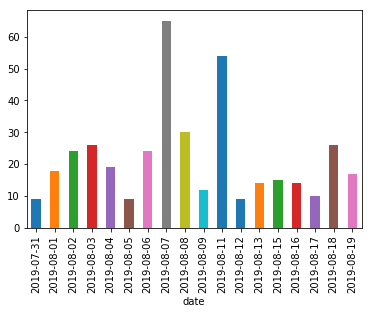

In [16]:
follower['date'] = follower['time_first'].dt.date
follower.groupby('date')['username'].count()[2:].plot(kind='bar')

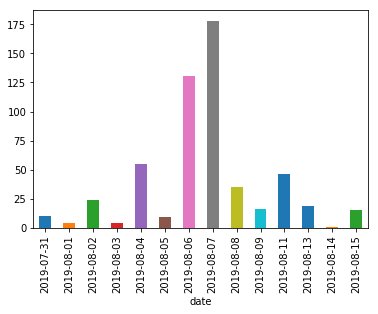

In [15]:
following['date'] = following['time_first'].dt.date
following.groupby('date')['username'].count()[1:].plot(kind='bar')

In [17]:
#shuffle(following_not_follower)
following_not_follower


['juliacfranco',
 'filipedeschamps',
 'leandrogrisoni',
 'seu_hulk',
 'beatriz.cabral.felicidade',
 'martal.borges',
 'adrienchaltiel',
 'lara_pmp',
 'fonsecamarcosfelipe',
 'marcos.zerbini',
 'delunaanderson',
 'angelamaria.rocha.71',
 'josemarcelopimenta',
 'monique.rj',
 'raspberrypifoundation',
 'peenricoarrig',
 'josecarmelomastrangelo',
 'pedroasti',
 'flaviocotrimpinheiro',
 'gautlmx',
 'bianca.moreirabm',
 'karen_fajardo_horn',
 'leonardoloriato',
 'thiagompc',
 'barrionuevomauro',
 'cesarsalim8',
 'marcellablok',
 'dani_calazans',
 'anapaulajelihovschi',
 'pgsiviero',
 'mila.campbell',
 'ployola03',
 'eduardosantos2308',
 'snsouza',
 'taycartagena',
 'nathsurf16',
 'helfereduardo',
 'psicologaclaracarr',
 'gomessoaresrenata',
 'henriqueqgalvao',
 'mpinhanez',
 'adrikahn',
 'hugobcmt',
 'jorge_porfirio_as',
 'anaclarabcastro',
 'anapaulaprado10',
 'thiago.l.campos',
 'andre.fernandes001',
 'anaghis',
 'marcellogt.rio',
 'stellacaymmi',
 'fernandesilvaantonio',
 'savios.machado'

In [48]:
for user in following_not_follower[50:150]:
    try:
        insta.unfollow_user(user)
        sleep(.3)
    except:
        print('unfollow ',user)

Unfollowing  dueumesmo
Unfollowing  raphaelyurivianna
Unfollowing  mcynthus
Unfollowing  katia.rocha.rj
Unfollowing  ngasparelli
Unfollowing  apolomvp
Unfollowing  lai.amaral
Unfollowing  gloria.vianna.37
Unfollowing  luiz_gustavo_rinke
Unfollowing  professoratamarayoga
Unfollowing  camilota1
Unfollowing  dricarneiroinrio
Unfollowing  pedro.mouracosta
Unfollowing  silvinaramal
Unfollowing  barrionuevomauro
Unfollowing  vollmermarcus
Unfollowing  angelamaria.rocha.71
Unfollowing  josemarcelopimenta
Unfollowing  fernando.hey
Unfollowing  psicologaclaracarr
Unfollowing  henriqueqgalvao
Unfollowing  monique.rj
Unfollowing  raspberrypifoundation
Unfollowing  marcosaraujo2005
Unfollowing  brk70
unfollow  paty_marques
Unfollowing  paulabcleite
Unfollowing  flavia.m.dos.anjos
Unfollowing  cecilsoares83
Unfollowing  nathsurf16
Unfollowing  clarasaddi
Unfollowing  mariliazangrandi
Unfollowing  camilansouto
Unfollowing  palhadoze
Unfollowing  nathiquintanilha
Unfollowing  vivijaccoud
Unfollowing 